### 학습목표
- 온습도 데이터를 분석하여 AI 제습기 개발을 위한 자료 생성
- 머신러닝의 7과정 이해한다
- 머신러닝의 학습과정을 이해하고 결과를 확인하자

### 머신러닝 7과정
1. 문제정의
2. 데이터 수집
3. 데이터 전처리
4. EDA (탐색적 데이터 분석)
5. 모델선택 및 하이퍼파라미터 조절
6. 모델학습
7. 모델평가

### 1. 문제정의
- Role: 서비스 기획자
- 가정 내 온습도 측정 제품을 고객에게 서비스 제공
- 최근 판매량 감소로 단순히 제품판매 뿐만아니라 새로운 고객가치를 창출하고자함
- 온습도 센서로부터 수집한 데이터를 기반으로 AI 제습기를 개발하고자함 -> 환기 여부를 알람해주는 서비스


### 2. 데이터 수집
- crawling, 공공데이터 활용, DataBase, csv

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# 구글 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pwd

/content


In [4]:
# 경로 변경
%cd /content/drive/MyDrive/Colab Notebooks/인사교_컴퓨터비전A_머신러닝

/content/drive/MyDrive/Colab Notebooks/인사교_컴퓨터비전A_머신러닝


In [5]:
# 현재 같은 폴더에 저장되어있는 파일 확인
!ls

 data				 'ex01_머신러닝 7과정 학습(배포용).ipynb'
'ex00_pandas기초(배포용).ipynb'


In [6]:
# 데이터 불러오기
data = pd.read_csv('./data/온습도 관측 데이터.csv')

In [7]:
data

,T,RH,AH,Comfortable
0,21.025,30.625000,0.753814,0
1,9.250,37.550000,0.439072,1
2,35.825,28.724999,1.662621,0
3,15.975,35.824999,0.645597,1
4,12.200,69.575001,0.985989,0
...,...,...,...,...
1541,19.250,46.625000,1.029781,0
1542,2.025,64.949998,0.466071,0
1543,35.325,28.475000,1.603368,0
1544,24.450,42.525000,1.285450,0


> **데이터 설명**

* 3개의 센서 데이터가 수집됨 (원활한 실습을 위해 라벨은 미리 달아두었음)
* 데이터 명세

| Column Name | 컬럼명 | 설명 |
|-------------|--------|------|
| T(temperature) | 온도 | 주변 환경의 온도 (섭씨) |
| RH(relative humidity) | 상대습도 | 공기 중 습도의 비율 (%) |
| AH(absolute humidity) | 절대습도 | 공기 중 실제 수증기량 |
| Comfortable | 쾌적 여부 | 환경이 쾌적한지 나타내는 이진값 - 0(불쾌), 1(상쾌) |

In [8]:
data.head()

,T,RH,AH,Comfortable
0,21.025,30.625000,0.753814,0
1,9.250,37.550000,0.439072,1
2,35.825,28.724999,1.662621,0
3,15.975,35.824999,0.645597,1
4,12.200,69.575001,0.985989,0


### 3. 데이터 전처리
- 이상치, 결측치 제거
- 변수 처리 (특성공학_특성추가, 삭제, 선택, 새로운 특성 생성... 등)
- 인코딩 (문자열데이터 -> 수치형)

In [9]:
data.info()
# 확인사항
#1. Non-Null Count -> 결측치 여부 확인 (머신러닝학습을 위해 결측지 존재 X)
#2. Dtype -> 데이터의 타입 확인 (머신러닝 학습을 위해 숫자형태의 데이터만 존재 O) -> 문자열 인코딩통해 수치형 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T            1546 non-null   float64
 1   RH           1546 non-null   float64
 2   AH           1546 non-null   float64
 3   Comfortable  1546 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 48.4 KB


##### 참고사항
- 데이터 전처리단계와 EDA(탐색적 데이터 분석) 경우는 유동적으로 왔다갔다하며 분석 진행
- 크게는 데이터 수집까지도 연결 가능

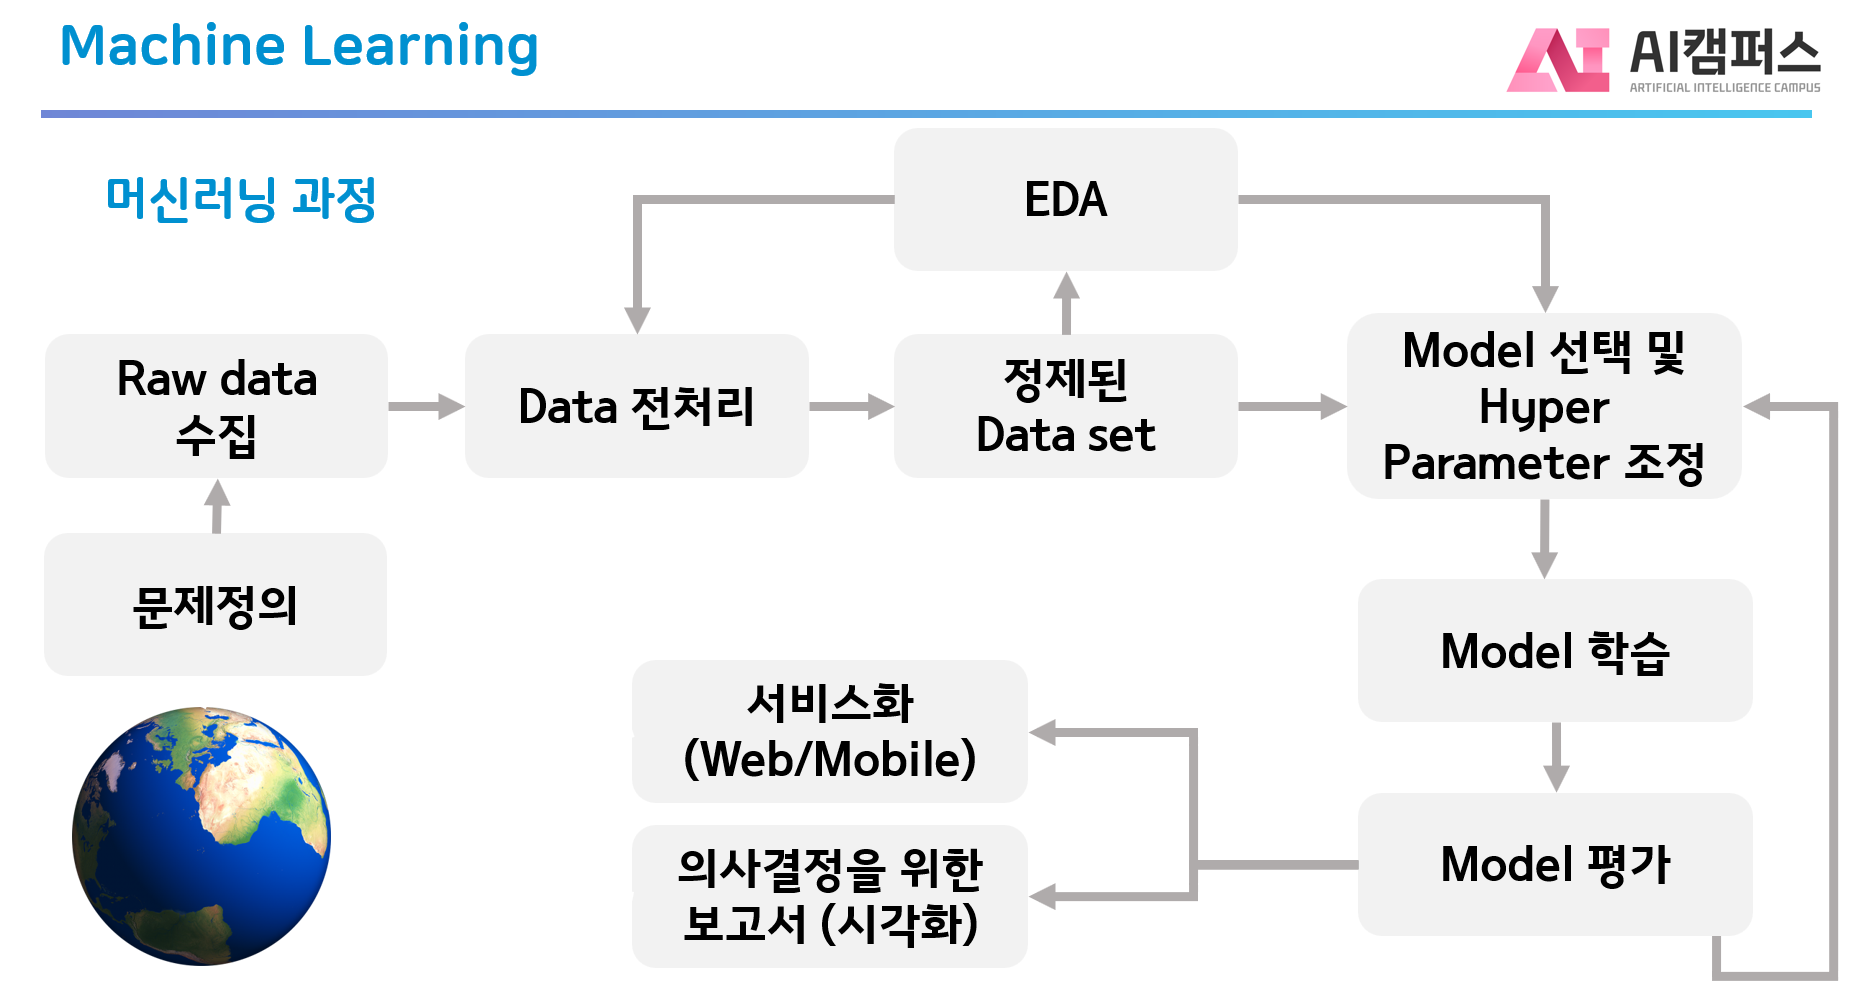

### 4. EDA (탐색적 데이터 분석, Exploratory Data Analysis)
- 데이터의 기술통계량 확인 (요약수치), 데이터를 시각화하여 다양한 각도에서 관찰, 이해하는 과정
- 데이터의 전처리를 위한 근거가 되기도 함
  - 예를 들어, 결측치를 처리할때 단순 데이터로 채우거나 단순 제거하는 것이 아닌, 대체할만한 값을들 탐색하여 결측치를 처리

In [10]:
# 데이터의 기술통계량 확인
data.describe()

,T,RH,AH,Comfortable
count,1546.000000,1546.000000,1546.000000,1546.000000
mean,18.702808,43.917987,0.977192,0.482536
std,8.787124,14.464104,0.423748,0.499857
min,-1.900000,9.225000,0.198757,0.000000
25%,11.825000,36.150000,0.639129,0.000000
50%,19.225000,38.724999,0.959642,0.000000
75%,25.168750,51.468750,1.289465,1.000000
max,44.600000,88.725000,2.139496,1.000000


In [11]:
# 상관계수 : 컬럼들끼리 비례,반비례 정도를 숫자로 표현한 값
data.corr()
# -1 ~ 1 사이의 값을 가지는 수치해석
# 절대값으로 1에 가까울 수록 관련도가 높다
# 상관계수 해석 순서
# 1. 상관계수에 절대값을 확인하자.
# 2. 절대값의 수치를 확인한 후에 기호를 해석하자.
# > 양수의 경우에는 양의 상관 관계(하나의 변수가 값이 증가하면 다른 변수도 값이 증가한다.)
# > 음수의 경우에는 음의 상관 관계(하나의 변수가 값이 증가하면 다른 변수는 값이 감소한다.)

,T,RH,AH,Comfortable
T,1.000000,-0.414828,0.776049,0.080162
RH,-0.414828,1.000000,0.182484,-0.431584
AH,0.776049,0.182484,1.000000,-0.113466
Comfortable,0.080162,-0.431584,-0.113466,1.000000


#### 상관계수 해석

```
|r| = 절대값  

· 0.0 <= |r| < 0.2 : 상관관계가 없다. = 선형의 관계가 없다.  

· 0.2 <= |r| < 0.4 : 약한 상관관계가 있다.  

· 0.4 <= |r| < 0.6 : 보통의 상관관계가 있다.  

· 0.6 <= |r| < 0.8 : 강한 (높은) 상관관계가 있다.  

· 0.8 <= |r| <= 1.0 : 매우 강한 (매우 높은) 상관관계가 있다.
```

### 학습전 데이터 준비(분리)
1. 문제데이터, 정답데이터
2. train(학습용 데이터), test(예측 및 평가용 데이터)

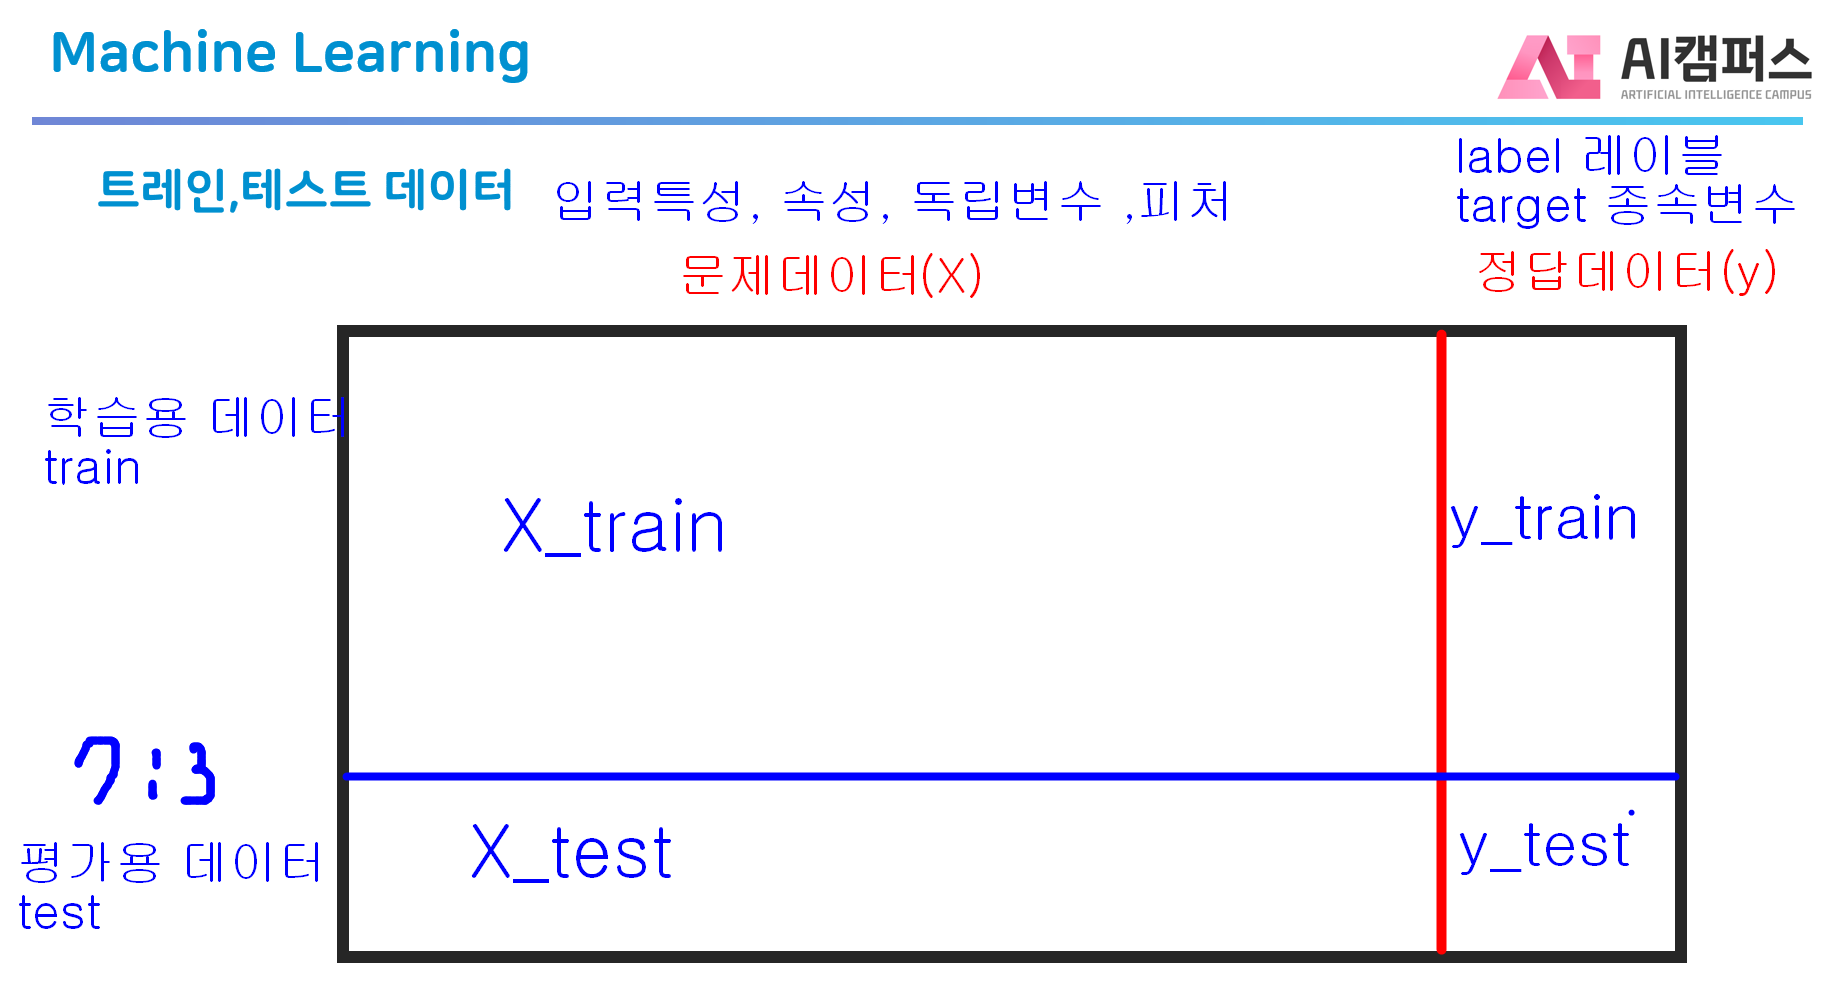

In [12]:
# 머신러닝 학습을 위한 데이터 분리
# 문제 데이터 / 정답 데이터 분할
X = data[['T', 'RH', 'AH']]
y = data['Comfortable']

In [13]:
# 데이터 크기 확인
X.shape, y.shape

((1546, 3), (1546,))

In [14]:
data.head()

,T,RH,AH,Comfortable
0,21.025,30.625000,0.753814,0
1,9.250,37.550000,0.439072,1
2,35.825,28.724999,1.662621,0
3,15.975,35.824999,0.645597,1
4,12.200,69.575001,0.985989,0


In [15]:
X.head()

,T,RH,AH
0,21.025,30.625000,0.753814
1,9.250,37.550000,0.439072
2,35.825,28.724999,1.662621
3,15.975,35.824999,0.645597
4,12.200,69.575001,0.985989


In [16]:
# 직접적인 train, test 분리 (70:30)
print(len(X) * 0.7)

X_train = X.iloc[ : 1082]
X_test = X.iloc[ 1082 : ]
y_train = y.iloc[ : 1082]
y_test = y.iloc[ 1082 : ]

1082.1999999999998


In [17]:
# 데이터 크기확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1082, 3), (464, 3), (1082,), (464,))

In [18]:
y_train.value_counts()

,count
Comfortable,
0,541
1,541


In [19]:
y_test.value_counts()

,count
Comfortable,
0,259
1,205


In [20]:
# 데이터 분할 도구 사용
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 20,
                                                    stratify = y
                                                    )
                                                    # test_size = 0.3, 평가 데이터의 비율 30%
                                                    # random_state = 20,  랜덤 시드 고정
                                                    # stratify = y  # 클래스 비율을 동일한 비율로 맞춰준다
                                                    # 매번 실행시 랜덤 샘플링이 일관성을 유지하도록 랜덤 규칙 고정

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1082, 3), (464, 3), (1082,), (464,))

In [22]:
y_train

,Comfortable
1372,0
18,1
456,1
1401,1
1454,1
...,...
551,1
1364,1
1384,0
847,0


### sklearn (사이킷런)
- 대표적인 머신러닝 라이브러리, 머신러닝에 필요한 다양한 도구들 지원
- 지도학습모델(분류/회귀), 비지도학습모델, 전처리도구, 실습용 데이터 등등 다양한 머신러닝 학습을 위한 도구를 지원
- https://scikit-learn.org/stable/getting_started.html

##### 모델 학습 예측 및 평가 과정
5. 모델 선택 및 하이퍼파라미터 조절
  - 모델 도구 불러오기
  - 모델 객체생성
6. 모델 학습
  - model.fit(학습용문제, 학습용정답)
7. 모델 평가
  - 예측: model.predict(평가용문제)  
      -> 평가 방법: accuracy_score(예측값, 실제값)
  - 평가: model.score(평가용문제, 평가용정답)

In [23]:
# KNN 모델 사용해보기
# 데이터의 특성 중  최근접한 이웃을 따라가는 방법
# 모델 도구 불러오기
from sklearn.neighbors import KNeighborsClassifier
# 모델 객체 생성
knn_model = KNeighborsClassifier()

In [24]:
# 모델 학습 model.fit(학습용문제, 학습용정답)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
# 모델 예측 model.predict(평가용문제)
pre = knn_model.predict(X_test)
pre

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,

In [26]:
# 예측값 실제값 비교
knn_model.predict(X_test)[1], y_test.iloc[1]

(np.int64(0), np.int64(0))

In [27]:
# 모델 평가
from sklearn.metrics import accuracy_score
# sklearn.metrics : 평가지표 모음집
# accuracy_score : 정확도 -> 전체 평가데이터에서 맞춘 평가 데이터의 비율
# 0 ~ 1사이의 숫자 출력 -> 1에 가까울수록 잘 맞춘 것, 1 = 100%

accuracy_score(y_test, pre)

0.9719827586206896

- 하이퍼 파라미터 조절
  - 모델의 성능을 높이기 위해 사람이 조절하는 파라미터

In [28]:
# knn 모델의 하이퍼파라미터 : 이웃의 수
# 객체 생성시 하이퍼파라미터 조절
knn_model2 = KNeighborsClassifier(n_neighbors = 1)

In [29]:
# 모델학습 fit
knn_model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
# 모델예측 predict
pre2 = knn_model2.predict(X_test)

In [31]:
# 모델평가 accuracy_score
accuracy_score(y_test, pre2)

0.9870689655172413

In [32]:
# 모델 평가 방법 2
knn_model2.score(X_test, y_test)

0.9870689655172413

### 일반화, 과대적합, 과소적합
- 일반화
  - 훈련데이터로 학습한 모델이 테스트데이터에 대해서도 정확히 예측하는 것 (훈련,테스트 모두 높은 정확도)
- 과대적합(overfitting)
  - 훈련데이터인 train 데이터에만 과하게 학습을하여 test 데이터에 대해서는 성능이 낮게 출력
- 과소적합 (underfitting)
  - 모델이 제대로된 학습을 하지 않아 train 데이터, test 데이터 모두에게서 성능이 낮게 출력

### 모델의 일반화 곡선
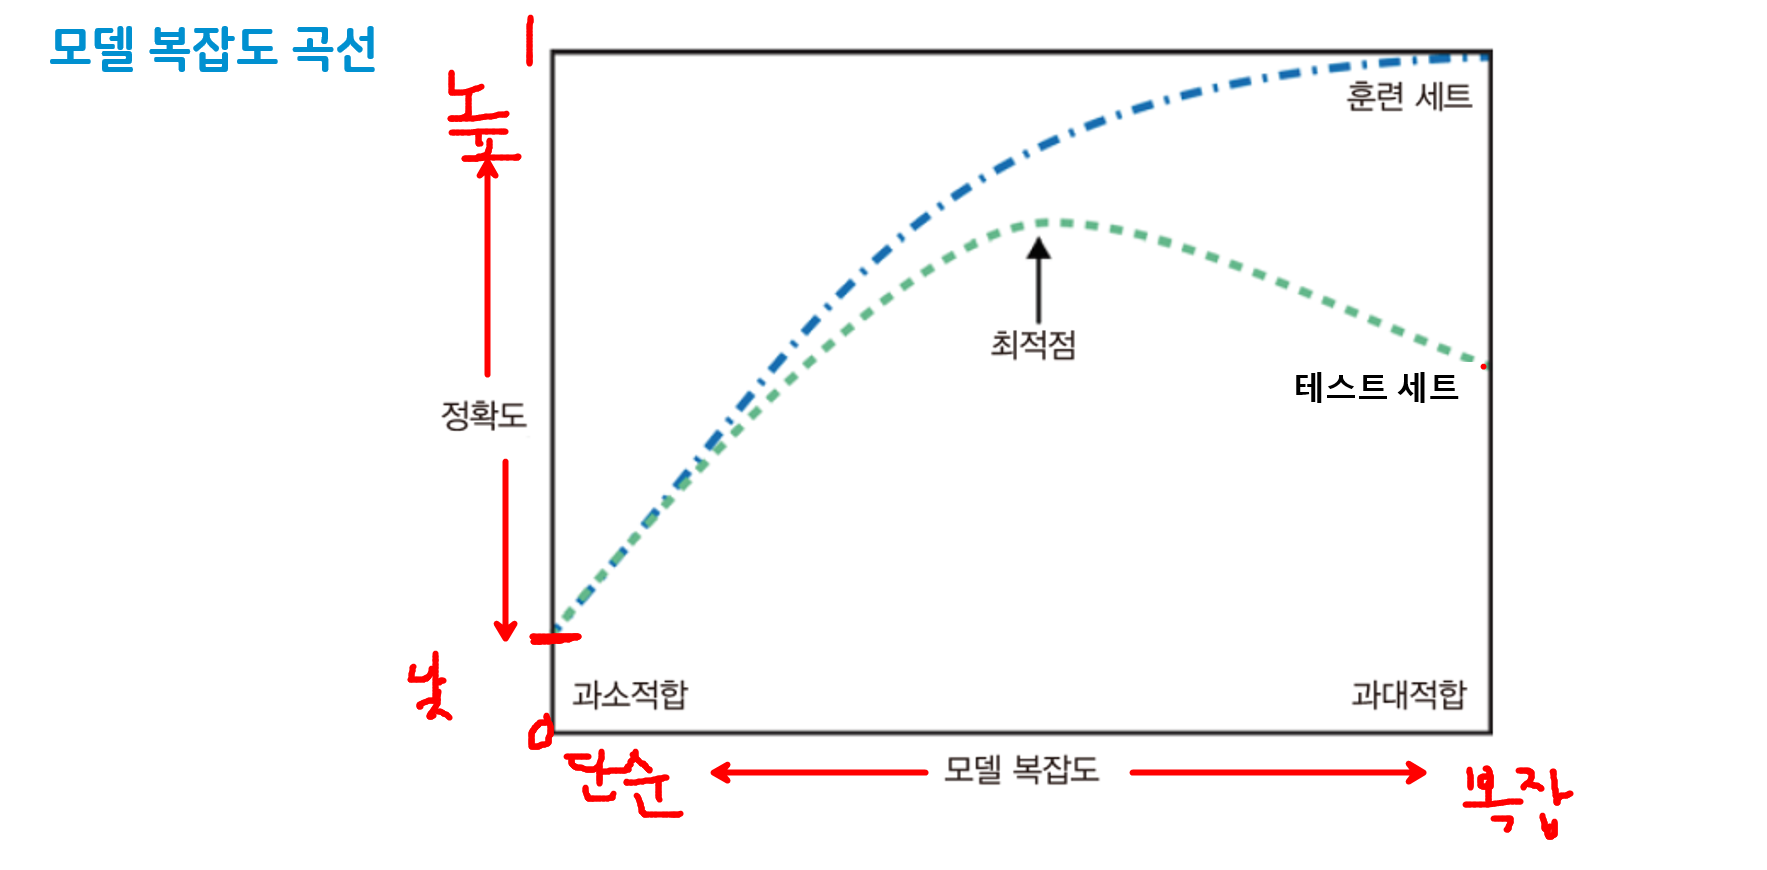

In [33]:
# 1부터 99까지의 이웃수를 하이퍼파라미터로 가지는 모델링
# 정확도 결과 시각화 (모델의 복잡도 곡선) -> train 정확도, test 정확도
# train / test의 정확도를 담을 빈 리스트를 선언
train_list = []
test_list = []

# 1부터 99까지 증가하는 수치값을 지정
n_set = range(1, 100)

for i in n_set :
    # 모델 선정
    knn_clf = KNeighborsClassifier(n_neighbors = i)
    # 모델 학습
    knn_clf.fit(X_train, y_train)
    # 모델 평가
    acc_train = knn_clf.score(X_train, y_train)
    acc_test = knn_clf.score(X_test, y_test)
    # 빈 리스트에 예측 성능 집어 넣기
    train_list.append(acc_train)
    test_list.append(acc_test)

In [34]:
train_list

[1.0,
 0.9972273567467652,
 0.9898336414048059,
 0.9898336414048059,
 0.9870609981515711,
 0.987985212569316,
 0.9805914972273567,
 0.9815157116451017,
 0.977818853974122,
 0.9787430683918669,
 0.9750462107208873,
 0.9759704251386322,
 0.967652495378928,
 0.9685767097966729,
 0.967652495378928,
 0.9685767097966729,
 0.967652495378928,
 0.967652495378928,
 0.966728280961183,
 0.966728280961183,
 0.9639556377079482,
 0.9639556377079482,
 0.9611829944547134,
 0.9611829944547134,
 0.9593345656192237,
 0.9611829944547134,
 0.9593345656192237,
 0.9602587800369686,
 0.9593345656192237,
 0.9593345656192237,
 0.9584103512014788,
 0.9584103512014788,
 0.9584103512014788,
 0.9584103512014788,
 0.955637707948244,
 0.955637707948244,
 0.9537892791127541,
 0.9547134935304991,
 0.9537892791127541,
 0.9547134935304991,
 0.9519408502772643,
 0.9519408502772643,
 0.9510166358595195,
 0.9519408502772643,
 0.9482439926062847,
 0.9491682070240296,
 0.9454713493530499,
 0.9482439926062847,
 0.94547134935304

In [35]:
test_list

[0.9870689655172413,
 0.9935344827586207,
 0.9762931034482759,
 0.9762931034482759,
 0.9719827586206896,
 0.9719827586206896,
 0.9698275862068966,
 0.9698275862068966,
 0.9633620689655172,
 0.9676724137931034,
 0.9655172413793104,
 0.9655172413793104,
 0.9612068965517241,
 0.9612068965517241,
 0.9568965517241379,
 0.959051724137931,
 0.9525862068965517,
 0.9568965517241379,
 0.9547413793103449,
 0.9547413793103449,
 0.9547413793103449,
 0.9547413793103449,
 0.9547413793103449,
 0.9547413793103449,
 0.9525862068965517,
 0.9525862068965517,
 0.9504310344827587,
 0.9504310344827587,
 0.9504310344827587,
 0.9504310344827587,
 0.9439655172413793,
 0.9439655172413793,
 0.9353448275862069,
 0.9375,
 0.9288793103448276,
 0.9310344827586207,
 0.9245689655172413,
 0.9245689655172413,
 0.9245689655172413,
 0.9245689655172413,
 0.9202586206896551,
 0.9202586206896551,
 0.9181034482758621,
 0.9202586206896551,
 0.9137931034482759,
 0.915948275862069,
 0.9094827586206896,
 0.9094827586206896,
 0.909

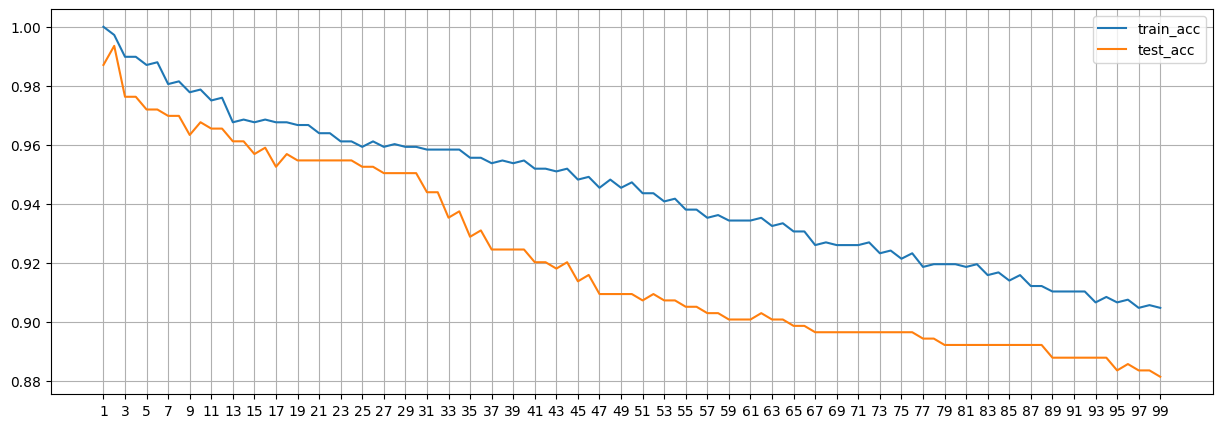

In [36]:
# 시각화 (모델의 복잡도 곡선)
plt.figure(figsize = (15, 5)) # 그래프의 행과 열의 크기 지정
plt.plot(n_set, train_list, label = 'train_acc') # 꺾은선 그래프 설정 / label : 해당 그래프에 이름표 부착
plt.plot(n_set, test_list, label = 'test_acc')
plt.legend() # 부착된 이름표를 출력하는 범례 지정
plt.xticks(range(1, 100, 2)) # X축의 눈금값 지정
plt.grid() # 격자무늬 출력
plt.show()

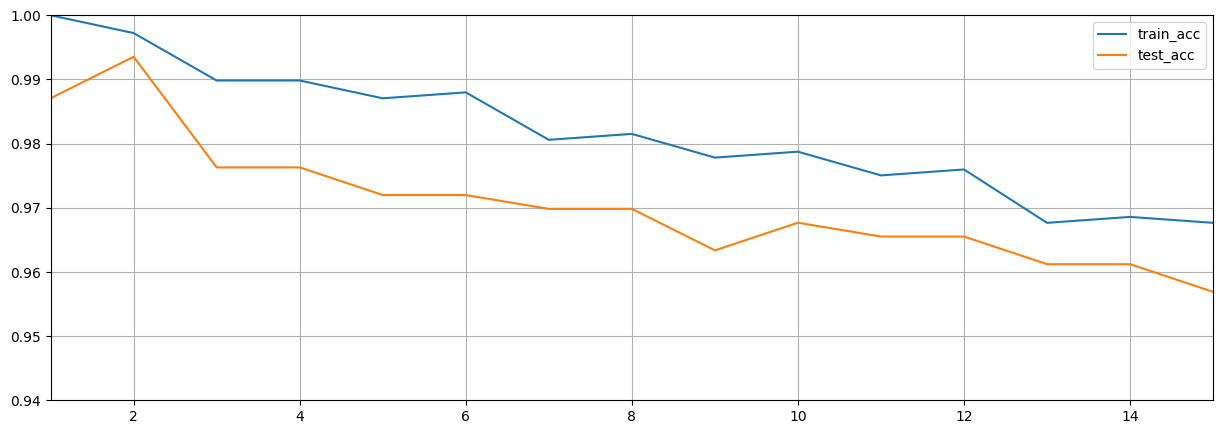

In [37]:
# 최적의 하이퍼파라미터 선택을 위해 그래프 확대 (0~15)
plt.figure(figsize = (15, 5)) # 그래프의 행과 열의 크기 지정
plt.plot(n_set, train_list, label = 'train_acc') # 꺾은선 그래프 설정 / label : 해당 그래프에 이름표 부착
plt.plot(n_set, test_list, label = 'test_acc')
plt.legend() # 부착된 이름표를 출력하는 범례 지정
# x축 범위 지정
plt.xlim(1, 15)
# y축 범위 지정
plt.ylim(0.94, 1)
plt.grid() # 격자무늬 출력
plt.show()

### Decision Tree (의사결정나무 모델)
- 스무고개 하듯이 질문(조건)을 통해 데이터를 분류하는 모델
- 불순도가 낮아지는 방향으로 질문을 선정

In [38]:
# 모델 import
from sklearn.tree import DecisionTreeClassifier
# 모델 객체 생성
tree_model = DecisionTreeClassifier()
# 트리모델 학습
tree_model.fit(X_train, y_train)
# 트리모델 성능 평가
tree_model.score(X_test, y_test)

0.9978448275862069

In [39]:
# 데이터 컬럼 확인
X.columns

Index(['T', 'RH', 'AH'], dtype='object')

In [40]:
# 한글 글꼴 설치하기
!apt-get install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 세션 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts,

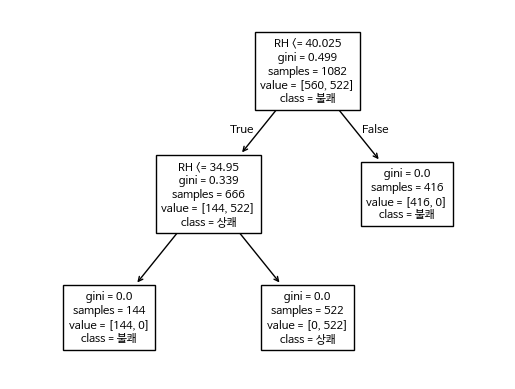

In [44]:
# 트리모델 시각화
plt.rc('font', family='NanumBarunGothic') # matplotlib에서 한글 글꼴 설정
from sklearn.tree import plot_tree
plot_tree(tree_model, # 학습된 디시전 트리 모델
          feature_names = X.columns, # 학습에 사용된 데이터의 특성
          class_names = ['불쾌', '상쾌'], # 0번 - 불쾌 / 1번 - 상쾌,
          fontsize = 8 # 글씨 크기 지정
          )
plt.show()

In [45]:
# 특성 중요도 확인해보기
tree_model.feature_importances_
# feature_importances_ : 특성 중요도
# 해당하는 특성이 정답을 예측하는 데 있어서 얼마나 영향을 미쳤는가?
# 특성 중요도의 총 합은 항상 1 (100%)
# T / RH / AH
# 현재 RH(절대 습도)만으로 모든 데이터를 완벽하게 분류할 수 있었다.

array([0., 1., 0.])

In [46]:
# RH라는 상대습도 데이터를 제외하고 트리모델을 학습시키면 어떻게 될까?
X_train2 = X_train[['T', "AH"]]
X_test2 = X_test[['T', 'AH']]

In [47]:
# 하이퍼파라미터 조절 X , 의사결정나무 학습 및 평가
# 모델 객체 생성
tree_model = DecisionTreeClassifier()
# 트리모델 학습
tree_model.fit(X_train2, y_train)
# 트리모델 성능 평가
tree_model.score(X_test2, y_test)

0.9245689655172413

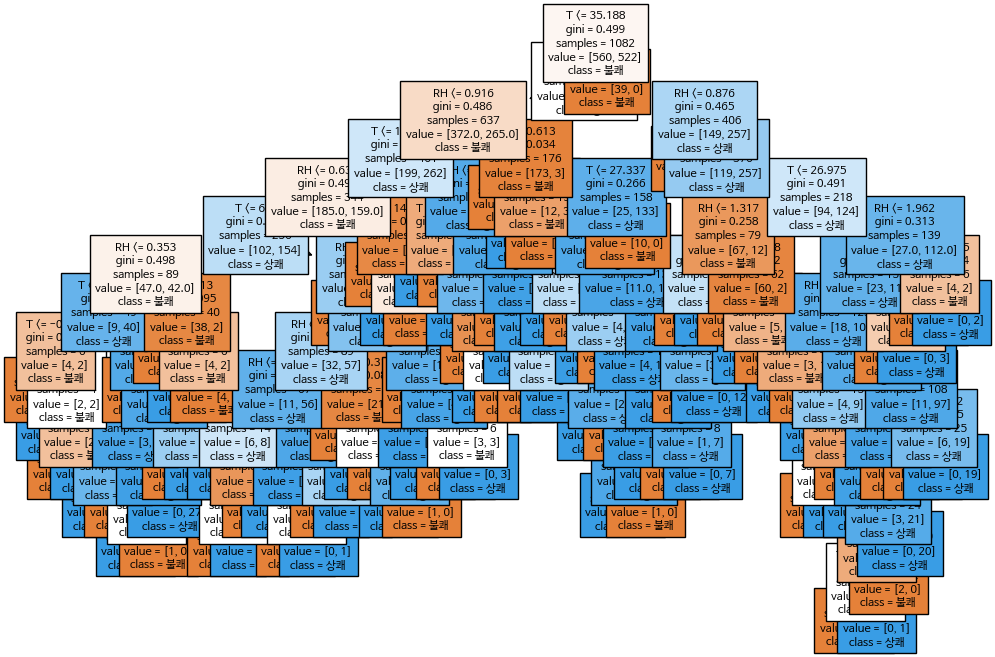

In [49]:
#시각화
plt.rc('font', family='NanumBarunGothic') # matplotlib에서 한글 글꼴 설정
from sklearn.tree import plot_tree
plt.figure(figsize = (12,8))
plot_tree(tree_model, # 학습된 디시전 트리 모델
          feature_names = X.columns, # 학습에 사용된 데이터의 특성
          class_names = ['불쾌', '상쾌'], # 0번 - 불쾌 / 1번 - 상쾌,
          fontsize = 8, # 글씨 크기 지정
          filled = True # 트리모델 내부에 색상을 채워줄것인가?
          )
plt.show()
# 모델이 너무 복잡해서 트리모델 시각화가 눈에 들어오지 않는다.
# 트리모델을 시각화한 결과 정답을 찾아가는 조건이 너무 복잡하다.
# 새로운 데이터가 들어왔을때 조건 하나가 틀린다면 예측이 성공적으로 이뤄지 힘든 구조
# 현제 상태는 과대 적합 상태

In [55]:
# 의사 결정 나무 모델 -> 과대적합의 확률이 높다
# 불순도가 0이 될때까지 학습을 진행
# 사전 가지치기를 통해 과대적합을 제어해주자
# 모델 객체 생성
tree_model2 = DecisionTreeClassifier(max_depth = 5, # 트리의 최대 깊이 -> 값이 클수록 아래로 뻗어가는 깊이가 깊어진다. 값이 클수록 과대적합
                                     max_leaf_nodes = 30, # 트리의 잎 개수 -> 클수록 과대 적합
                                     min_samples_split = 10, # 노드를 분할하기 위한 최소 샘플수 -> 작을 수록 과대 적합
                                     min_samples_leaf = 20 # 리프노드가 되기위한 최소 샘플 수 -> 작을수록 과대적합
                                     )

In [56]:
tree_model2.fit(X_train2, y_train)
tree_model2.score(X_test2, y_test)

0.771551724137931

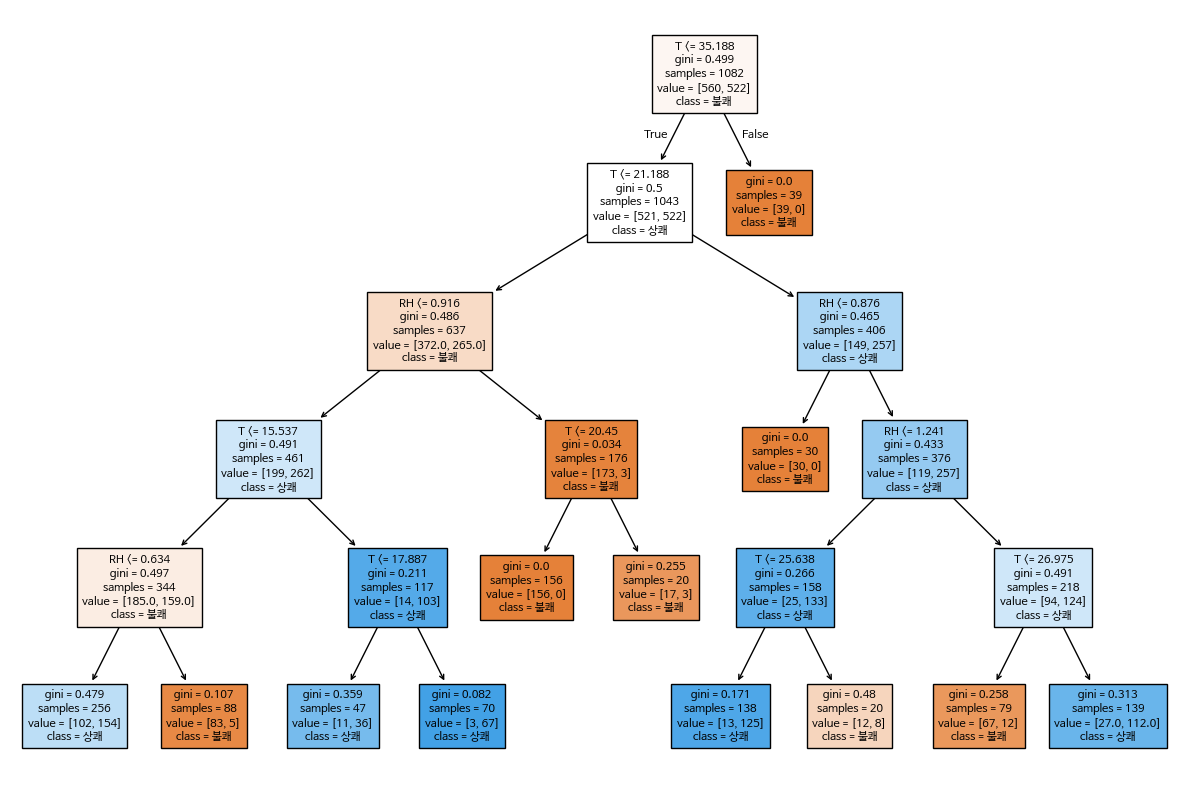

In [57]:
plt.rc('font', family='NanumBarunGothic') # matplotlib에서 한글 글꼴 설정
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(tree_model2, # 학습된 디시전 트리 모델
          feature_names = X.columns, # 학습에 사용된 데이터의 특성
          class_names = ['불쾌', '상쾌'], # 0번 - 불쾌 / 1번 - 상쾌,
          fontsize = 8, # 글씨 크기 지정
          filled = True # 트리모델 내부에 색상을 채워줄것인가?
          )
plt.show()